In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [12]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:].values.ravel()

In [13]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Feature selection

Feature ranking:
1. feature Assists (0.040)
2. feature Clean sheets (0.040)
3. feature Big Chances Created (0.031)
4. feature Goals (0.028)
5. feature Blocked shots (0.026)
6. feature Goals Conceded (0.026)
7. feature Passes (0.026)
8. feature Goals with right foot (0.023)
9. feature Shots on target (0.023)
10. feature Goals with left foot (0.022)
11. feature Hit woodwork (0.022)
12. feature Tackle success % (0.021)
13. feature Accurate long balls (0.020)
14. feature Sweeper clearances (0.020)
15. feature Big chances missed (0.020)
16. feature Catches (0.019)
17. feature Penalties scored (0.019)
18. feature Crosses (0.019)
19. feature Last man tackles (0.019)
20. feature Headed goals (0.019)
21. feature Own goals (0.018)
22. feature Fouls (0.018)
23. feature Shooting accuracy % (0.018)
24. feature Through balls (0.018)
25. feature Freekicks scored (0.018)
26. feature Penalties Saved (0.018)
27. feature Goals per match (0.018)
28. feature Shots (0.018)
29. feature Clearances off line (0

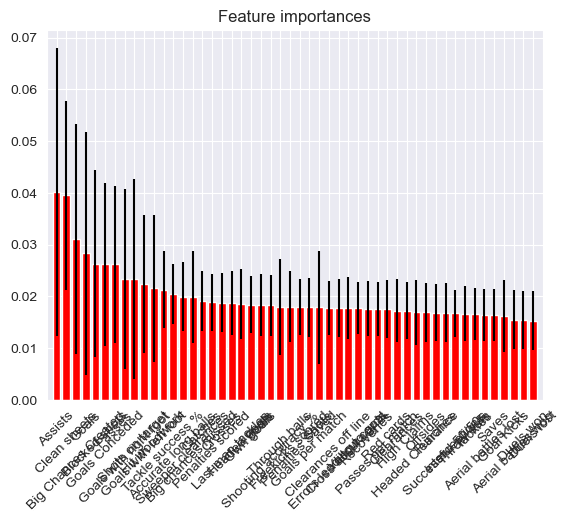

In [14]:
forest=RandomForestClassifier()
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [5]:
X=X.drop(columns=X.columns[indices[15:]])

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 50), (2835,), (354, 50), (354,), (355, 50), (355,))

## Nearest Neighbor

In [17]:
clf = NearestCentroid()
clf.fit(X_train,y_train)

NearestCentroid()

In [18]:
clf.score(X_test,y_test)

0.5254237288135594

In [19]:
clf.score(X_val,y_val)

0.48732394366197185

better with more features